In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ip=pd.read_csv(r"C:\Users\HP\Downloads\ML Project - Linear Regression Insurance Prediction 16955515670.csv")

In [3]:
ip.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ip.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ip.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ip.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

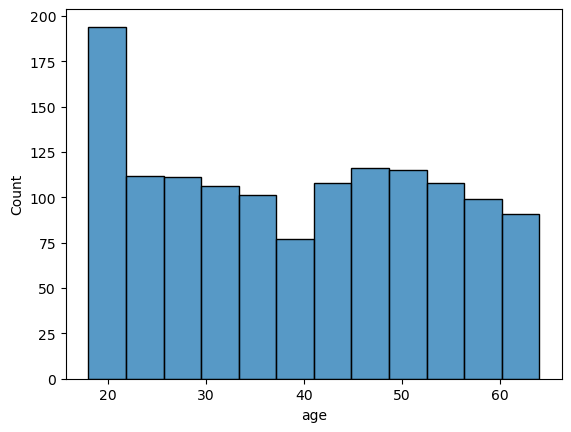

In [8]:
# more pople here in 20 age
sns.histplot(x=ip["age"])
plt.show()

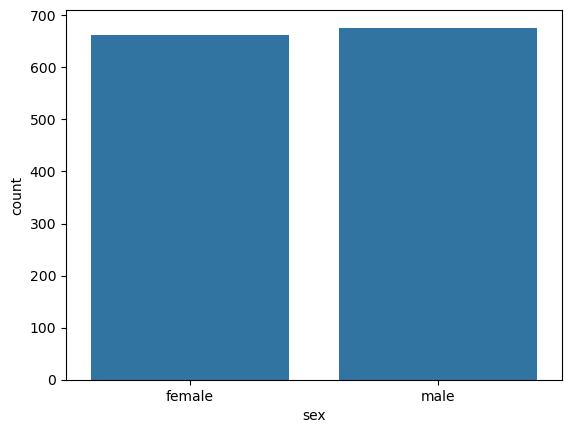

In [9]:
#count of gender
sns.countplot(x=ip["sex"])
plt.show()

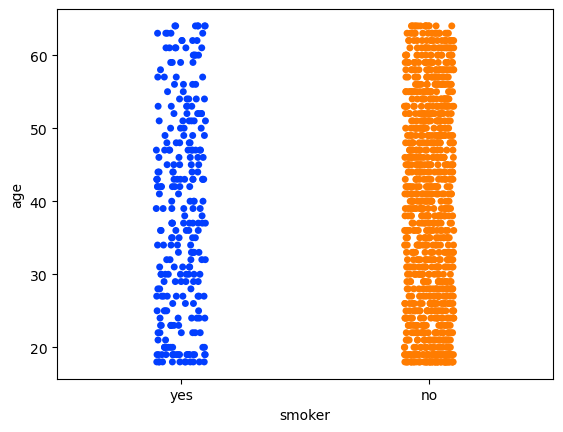

In [10]:
# age with smoking habbit
sns.stripplot(x=ip["smoker"],y=ip["age"],palette="bright")
plt.show()

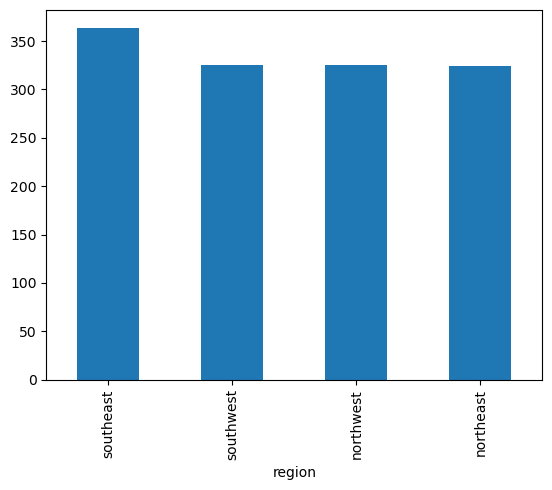

In [11]:
# which region people in data 
ip["region"].value_counts().plot(kind="bar")
plt.show()

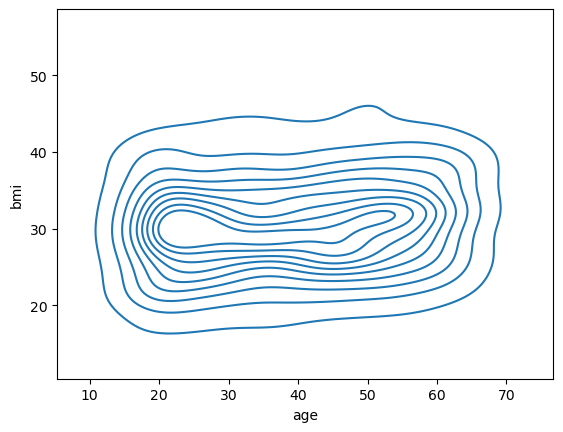

In [12]:
# bmi for age 19-45 age of range 
sns.kdeplot(data=ip,x="age",y="bmi")
plt.show()

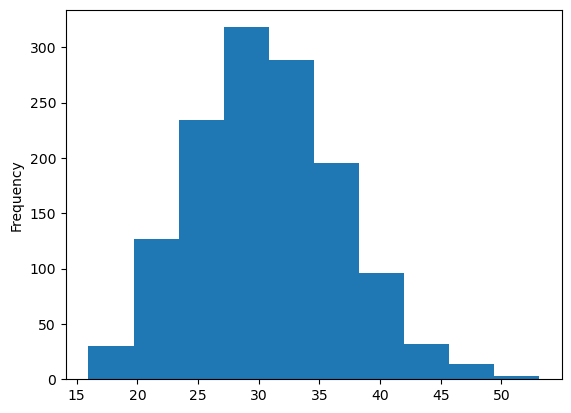

In [13]:
# bmi base charges
ip.groupby("charges")["bmi"].mean().plot(kind="hist")
plt.show()

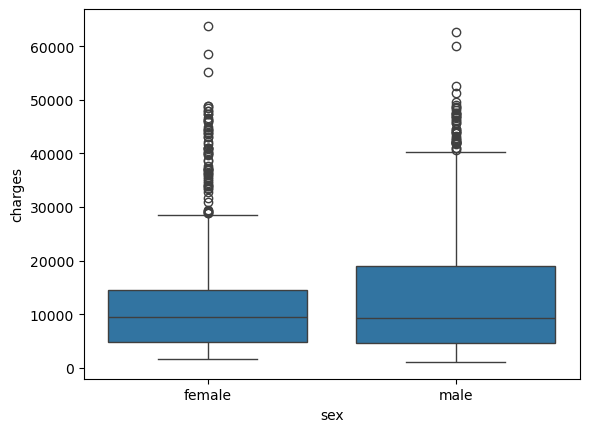

In [14]:
#gendar base charges
sns.boxplot(data=ip,x="sex",y="charges")
plt.show()

In [15]:
ip.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [18]:
new=ohe.fit_transform(ip[["sex","smoker","region"]])

In [19]:
new_c=pd.DataFrame(new,columns=ohe.get_feature_names_out())

In [20]:
ip1=pd.concat([ip,new_c],axis=1)

In [21]:
ip1

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,1.0


In [22]:
ip1.drop(["sex","smoker","region"],axis=1,inplace=True)

In [23]:
ip1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


In [24]:
ip1.rename({'sex_male':'sex','smoker_yes':'smoker'},axis=1,inplace=True)

In [25]:
ip1

,age,bmi,children,charges,sex,smoker,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


# Spliting

In [27]:
x=ip1.drop("charges",axis=1)

In [28]:
y=ip1["charges"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,train_size=0.8,random_state=2)

In [31]:
x_train

,age,bmi,children,sex,smoker,region_northwest,region_southeast,region_southwest
882,21,22.135,0,0.0,0.0,0.0,0.0,0.0
505,37,30.875,3,1.0,0.0,1.0,0.0,0.0
798,58,33.100,0,0.0,0.0,0.0,0.0,1.0
792,22,23.180,0,0.0,0.0,0.0,0.0,0.0
201,48,32.230,1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
466,60,28.700,1,0.0,0.0,0.0,0.0,1.0
299,48,28.880,1,0.0,0.0,1.0,0.0,0.0
493,61,43.400,0,1.0,0.0,0.0,0.0,1.0
527,51,25.800,1,0.0,0.0,0.0,0.0,1.0


In [32]:
#scling
from sklearn.preprocessing import RobustScaler

ss=RobustScaler()

train_scling=ss.fit_transform(x_train)

test_scling=ss.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,KFold

k=KFold(n_splits=5)

list=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),SVR()]


for i in list:
    model=i
    print(model)
    print(cross_val_score(model,x_train,y_train,cv=k).mean())

LinearRegression()
0.7351984389459998
DecisionTreeRegressor()
0.7005892651010466
RandomForestRegressor()
0.8265028486197442
KNeighborsRegressor()
0.09457701647790273
SVR()
-0.1126552274302505


In [34]:
for i in list:
    model=i
    print(model)
    print(cross_val_score(model,train_scling,y_train,cv=k).mean())


LinearRegression()
0.7351984389459999
DecisionTreeRegressor()
0.7019155792100328
RandomForestRegressor()
0.8273090457735623
KNeighborsRegressor()
0.7404214810200255
SVR()
-0.11072191051616258


# LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

lr.score(x_train,y_train)

lr.score(x_test,y_test)

0.7449415564623685

# Metrix

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
lr.coef_

array([  251.22566407,   332.82271398,   587.9253102 ,   -37.12240075,
       23912.34523027,  -379.18996345,  -784.48435961,  -947.2381839 ])

In [41]:
r2_score(y_train,lr.predict(x_train))

0.7520187377309014

In [42]:
mean_absolute_error(y_train,lr.predict(x_train))

4138.842762471063

In [43]:
mean_squared_error(y_train,lr.predict(x_train))

36100283.869831294

# RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf=RandomForestRegressor(max_depth=50, min_samples_split=50,n_estimators=250)

In [47]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, min_samples_split=50, n_estimators=250)

In [48]:
rf.score(x_train,y_train)

0.8788204089633022

In [49]:
rf.score(x_test,y_test)

0.8603003919521446

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
dic={
    "max_depth":[50,100,150,200],
    "n_estimators":[50,100,200,300,400],
    "min_samples_split":[50,80,100,120,150]
}

In [52]:
gscv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=dic,cv=k)

In [53]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 100, 150, 200],
                         'min_samples_split': [50, 80, 100, 120, 150],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [54]:
gscv.best_estimator_

RandomForestRegressor(max_depth=150, min_samples_split=50)

In [901]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [891]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4)

In [1412]:
ab=AdaBoostRegressor(estimator=dt,n_estimators=50,random_state=72)

In [1414]:
ab.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=72)

In [1415]:
ab.score(x_train,y_train)

0.8611405925989333

In [1416]:
ab.score(x_test,y_test)

0.8398019854780132

In [1386]:
gb=GradientBoostingRegressor(max_depth=1000, min_samples_split=150,
                          n_estimators=15)

In [1388]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=1000, min_samples_split=150,
                          n_estimators=15)

In [1390]:
gb.score(x_train,y_train)

0.8199845368414465

In [1391]:
gb.score(x_test,y_test)

0.8100897715834505

In [1394]:
from sklearn.model_selection import GridSearchCV

In [1267]:
dic={
    "max_depth":[1000,2000,3000,4000,5000],
    "n_estimators":[50,100,200,300,400],
    "min_samples_split":[50,80,100,120,150]
}

In [1271]:
gscv=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=dic,cv=k)

In [1273]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1000, 2000, 3000, 4000, 5000],
                         'min_samples_split': [50, 80, 100, 120, 150],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [1277]:
gscv.best_estimator_

GradientBoostingRegressor(max_depth=1000, min_samples_split=150,
                          n_estimators=50)